# Definition of quays polygons for Stockholm

In [30]:
from math import cos, sin, pi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

#Definition of main quay polygon

#  
#    p3 ------ p2 \ 
#    |         |   }depth
#    |         |   /
#    p0 ------ p1 /

## Input section

In [31]:
#Position and heading of vessel center when docked (from autonomy config file)
p_docked_north = np.array([-455.324, -343.544])
dir_docked_north = 1.9798

p_docked_south = np.array([-519.028, -309.423])
dir_docked_south = 2.8893

#Vessel dimensions
vessel_L = 8.658
vessel_B = 4

#Define quay geometries

#Origin of local quay coordinates is at p0 of the main quay polygon with x-axis pointing from p0 to p1 of the main quay
#and y-axis pointing in the direction of the outrigger

#North quay
#Main quay polygon
p0_north_main = np.array([0,0])
p1_north_main = np.array([4, 0])
depth_north_main = 4.8

#South quay
#Main quay polygon
p0_south_main = np.array([0,0])
p1_south_main = np.array([4, 0])
depth_south_main = 4.8


Calculate quay polygons in NED frame

In [32]:
#Position vessel center i local quay frame when the vessel is docked 
p_vessel_center_north = p0_north_main + np.array([vessel_B/2, vessel_L/2])
p_vessel_center_south = p0_south_main + np.array([vessel_B/2, vessel_L/2])

#Angle of local quay frames relative to NED frames
dir_north_quay = dir_docked_north - pi/2
dir_south_quay = dir_docked_south + pi/2

#Rotation matrices for transforming between NED and local quay frames
R_north = np.array([(cos(dir_north_quay), -sin(dir_north_quay)), (sin(dir_north_quay), cos(dir_north_quay))])
R_south = np.array([(cos(dir_south_quay), -sin(dir_south_quay)), (sin(dir_south_quay), cos(dir_south_quay))])


#Position and orientation of local quay frames in NED frame
p_origin_north_quay = p_docked_north - R_north@p_vessel_center_north
p_origin_south_quay = p_docked_south - R_south@p_vessel_center_south

#Transform quay coordinates to NED frame
p0_north_main_ned = p_origin_north_quay + R_north@p0_north_main
p1_north_main_ned = p_origin_north_quay + R_north@p1_north_main
p2_north_main_ned = p_origin_north_quay + R_north@(p1_north_main + np.array([0.0, -depth_north_main]))
p3_north_main_ned = p_origin_north_quay + R_north@(p0_north_main + np.array([0.0, -depth_north_main]))

p0_south_main_ned = p_origin_south_quay + R_south@p0_south_main
p1_south_main_ned = p_origin_south_quay + R_south@p1_south_main
p2_south_main_ned = p_origin_south_quay + R_south@(p1_south_main + np.array([0.0, -depth_south_main]))
p3_south_main_ned = p_origin_south_quay + R_south@(p0_south_main + np.array([0.0, -depth_south_main]))

Draw quays for validation

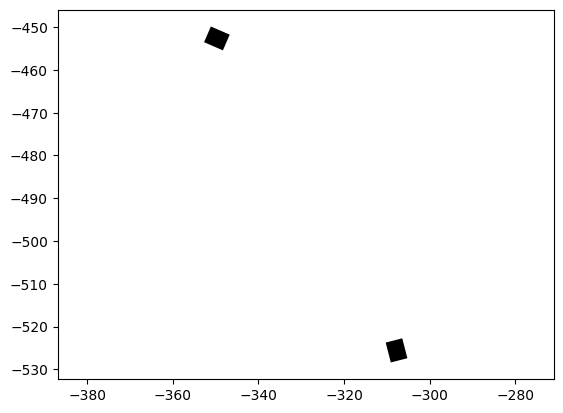

In [33]:
north_main_poly = Polygon(np.fliplr(np.array([p0_north_main_ned, p1_north_main_ned, p2_north_main_ned, p3_north_main_ned, p0_north_main_ned])), facecolor = 'k')

south_main_poly = Polygon(np.fliplr(np.array([p0_south_main_ned, p1_south_main_ned, p2_south_main_ned, p3_south_main_ned, p0_south_main_ned])), facecolor = 'k')

fig,ax = plt.subplots()
ax.add_patch(north_main_poly)
ax.add_patch(south_main_poly)
ax.axis('equal')
plt.show()

Print coordinates output needed for OSPSystemStructure

In [34]:
print('South p0 main: {}\nSouth p1 main: {}'.format(p0_south_main_ned, p1_south_main_ned))
print('North p0 main: {}\nNorth p1 main: {}'.format(p0_north_main_ned, p1_north_main_ned))

South p0 main: [-522.72070602 -306.4056894 ]
South p1 main: [-523.71920477 -310.27906006]
North p0 main: [-455.43741173 -348.31132407]
North p1 main: [-451.76734168 -346.72054256]


Generate XML output for copying into OspSystemStructure.xml

In [35]:
print('<!-- Ravnkloa -->')
print('<InitialValue variable="quay_1_en"><Boolean value="true"/></InitialValue>')
print('<InitialValue variable="quay_1_p0[1]"><Real value="{0}"/></InitialValue>'.format(p0_south_main_ned[0]))
print('<InitialValue variable="quay_1_p0[2]"><Real value="{0}"/></InitialValue>'.format(p0_south_main_ned[1]))
print('<InitialValue variable="quay_1_p1[1]"><Real value="{0}"/></InitialValue>'.format(p1_south_main_ned[0]))
print('<InitialValue variable="quay_1_p1[2]"><Real value="{0}"/></InitialValue>'.format(p1_south_main_ned[1]))
print('<InitialValue variable="quay_1_depth"><Real value="{0}"/></InitialValue>'.format(depth_south_main))

print('<!-- Fosenkaia -->')
print('<InitialValue variable="quay_2_en"><Boolean value="true"/></InitialValue>')
print('<InitialValue variable="quay_2_p0[1]"><Real value="{0}"/></InitialValue>'.format(p0_north_main_ned[0]))
print('<InitialValue variable="quay_2_p0[2]"><Real value="{0}"/></InitialValue>'.format(p0_north_main_ned[1]))
print('<InitialValue variable="quay_2_p1[1]"><Real value="{0}"/></InitialValue>'.format(p1_north_main_ned[0]))
print('<InitialValue variable="quay_2_p1[2]"><Real value="{0}"/></InitialValue>'.format(p1_north_main_ned[1]))
print('<InitialValue variable="quay_2_depth"><Real value="{0}"/></InitialValue>'.format(depth_north_main))

<!-- Ravnkloa -->
<InitialValue variable="quay_1_en"><Boolean value="true"/></InitialValue>
<InitialValue variable="quay_1_p0[1]"><Real value="-522.7207060180632"/></InitialValue>
<InitialValue variable="quay_1_p0[2]"><Real value="-306.40568939879245"/></InitialValue>
<InitialValue variable="quay_1_p1[1]"><Real value="-523.7192047686264"/></InitialValue>
<InitialValue variable="quay_1_p1[2]"><Real value="-310.2790600556137"/></InitialValue>
<InitialValue variable="quay_1_depth"><Real value="4.8"/></InitialValue>
<!-- Fosenkaia -->
<InitialValue variable="quay_2_en"><Boolean value="true"/></InitialValue>
<InitialValue variable="quay_2_p0[1]"><Real value="-455.43741173300276"/></InitialValue>
<InitialValue variable="quay_2_p0[2]"><Real value="-348.3113240689948"/></InitialValue>
<InitialValue variable="quay_2_p1[1]"><Real value="-451.76734168217365"/></InitialValue>
<InitialValue variable="quay_2_p1[2]"><Real value="-346.7205425560248"/></InitialValue>
<InitialValue variable="quay_2_dept